In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm

%matplotlib inline
import seaborn as sns
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score


Business Goal: Predict the price the dealership will get for a used Toyota Corolla.

In [24]:
# Read csv
corolla_df = pd.read_csv("ToyotaCorolla.csv")


In [25]:
# Obtain the first 1000 observations in the dataset
corolla_df = corolla_df.iloc[0:1000]

# Determine feature variables (independent variables)
features = [
    "Age_08_04",
    "KM",
    "Fuel_Type",
    "HP",
    "Met_Color",
    "Automatic",
    "cc",
    "Doors",
    "Quarterly_Tax",
    "Weight"
]

# Determine target variable (dependent variable)
target = "Price"

# Let X equal encoded features
X = pd.get_dummies(corolla_df[features], drop_first=True)

# Let y equal target
y = corolla_df[target]


In [30]:
# Partition the data into training (60%) and validation (40%) sets
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4)


In [31]:
# Fit a multiple linear regression model to predict the price

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# Print y-intercept
print(f"Intercept: {car_lm.intercept_}")

# Print coefficients
coef = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": car_lm.coef_
})

print(coef)

# Print performance measures (training data)
regressionSummary(train_y, car_lm.predict(train_X))


Intercept: -4492.469903196015
             Feature  Coefficient
0          Age_08_04  -131.655896
1                 KM    -0.019921
2                 HP    40.206723
3          Met_Color    21.916759
4          Automatic   238.327735
5                 cc     0.002043
6              Doors   -48.144973
7      Quarterly_Tax    16.150926
8             Weight    14.845506
9   Fuel_Type_Diesel  1311.544399
10  Fuel_Type_Petrol  2745.600271

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1384.3585
            Mean Absolute Error (MAE) : 1043.4074
          Mean Percentage Error (MPE) : -0.9835
Mean Absolute Percentage Error (MAPE) : 9.2909


/Users/stevenkwan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/stevenkwan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/stevenkwan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [32]:
# Use predict() to make predictions on a new set (validation set)
car_lm_pred = car_lm.predict(valid_X)

# Show Predicted, Actual, and Residual
result_df = pd.DataFrame({
    "Predicted Values": car_lm_pred,
    "Actual Values": valid_y,
    "Residual": valid_y - car_lm_pred
})

print(result_df)

# Print performance measures (validation data)
regressionSummary(valid_y, car_lm_pred)


     Predicted Values  Actual Values     Residual
59       15882.977199          15999   116.022801
310      13830.059508          12950  -880.059508
189       9839.110134           7750 -2089.110134
474      11512.081873          10450 -1062.081873
35       15434.832211          15750   315.167789
..                ...            ...          ...
522      11796.961205           9650 -2146.961205
891       9622.297566          11500  1877.702434
555      11658.692192          11250  -408.692192
676       9437.913753           9500    62.086247
705       9203.599843           9900   696.400157

[400 rows x 3 columns]

Regression statistics

                      Mean Error (ME) : -73.3753
       Root Mean Squared Error (RMSE) : 1315.1823
            Mean Absolute Error (MAE) : 1003.9770
          Mean Percentage Error (MPE) : -1.8513
Mean Absolute Percentage Error (MAPE) : 9.0140


/Users/stevenkwan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/stevenkwan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/stevenkwan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


<Axes: xlabel='Residual', ylabel='Count'>

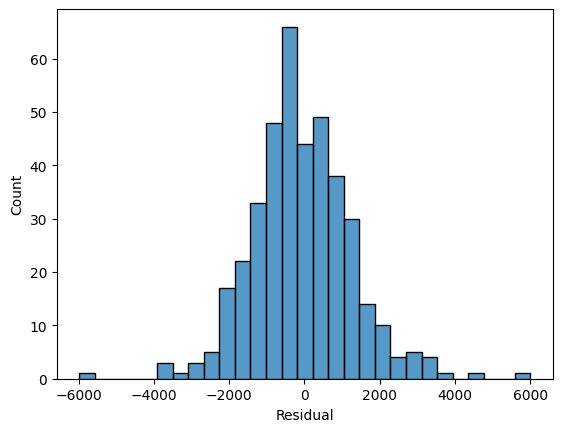

In [33]:
fig, ax = plt.subplots()

sns.histplot(
    data=result_df,
    x="Residual"
)
